# Sleep as a Predictor to Health in the Global Setting
## Research Question:

Test if the combined data on sleep in relation to people’s health and time allocation from each country can be used to predict the overall mental and physical healthiness (measured using the happiness index) of people from different global demographics.

## Rationale:

Sleep is a critical biological function that affects physical health, mental health, and overall daily functioning. The quality and duration of sleep can significantly influence an individual's health outcomes and quality of life so understanding the relationship between physical and mental health and sleep across different global demographics can help us predict which country will be the healthiest overall.

## Objective:
1) To determine the relationship between sleep quality and physical health indicators (like heart rate and blood pressure).
2) To analyze the sleep across global demographics and determine if there is a significant difference between people in different countries
3) Use this data to predict which country is overall the healthiest and check with a known happiness score from another database to see if we can predict a country’s overall happiness and health using the amount of sleep they get.

# Research Data:
1) Relationship between sleep, health and lifestyle of people: https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset
2) World happiness report 2019: https://www.kaggle.com/datasets/mathurinache/world-happiness-report?resource=download
3) Time spent by people around the world https://www.kaggle.com/datasets/sujaykapadnis/what-humans-are-doing






       Country                           Region  Rank 2019  Score 2019  \
0  Afghanistan                    Southern Asia        154       3.203   
1      Albania       Central and Eastern Europe        107       4.719   
2      Algeria  Middle East and Northern Africa         88       5.211   
3    Argentina      Latin America and Caribbean         47       6.086   
4      Armenia       Central and Eastern Europe        116       4.559   

   GDP 2019  Family 2019  Life Expectancy 2019  Freedom 2019  Trust 2019  \
0     0.350        0.517                 0.361         0.000       0.025   
1     0.947        0.848                 0.874         0.383       0.027   
2     1.002        1.160                 0.785         0.086       0.114   
3     1.092        1.432                 0.881         0.471       0.050   
4     0.850        1.055                 0.815         0.283       0.064   

   Generosity 2019  
0            0.158  
1            0.178  
2            0.073  
3            0

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


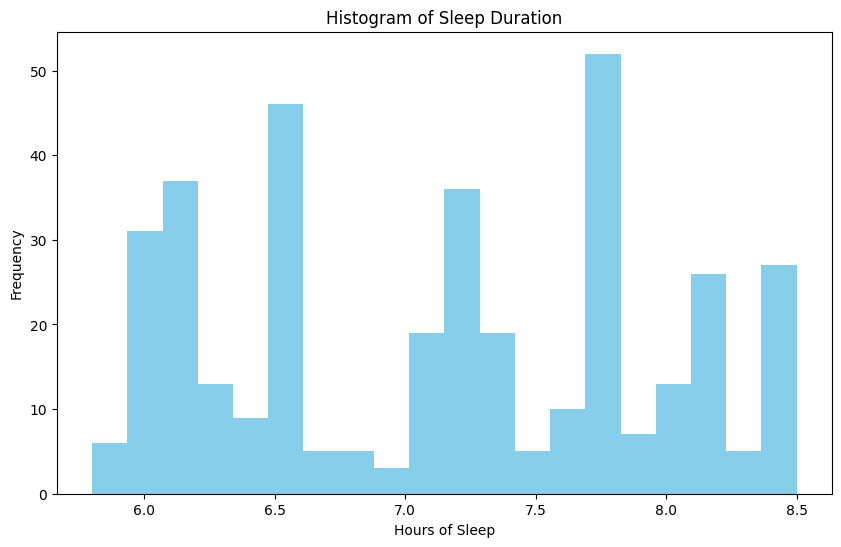

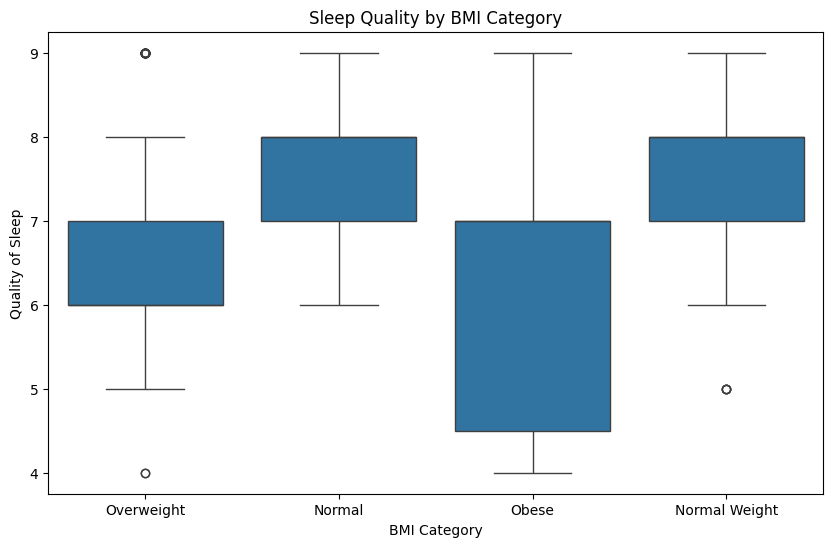

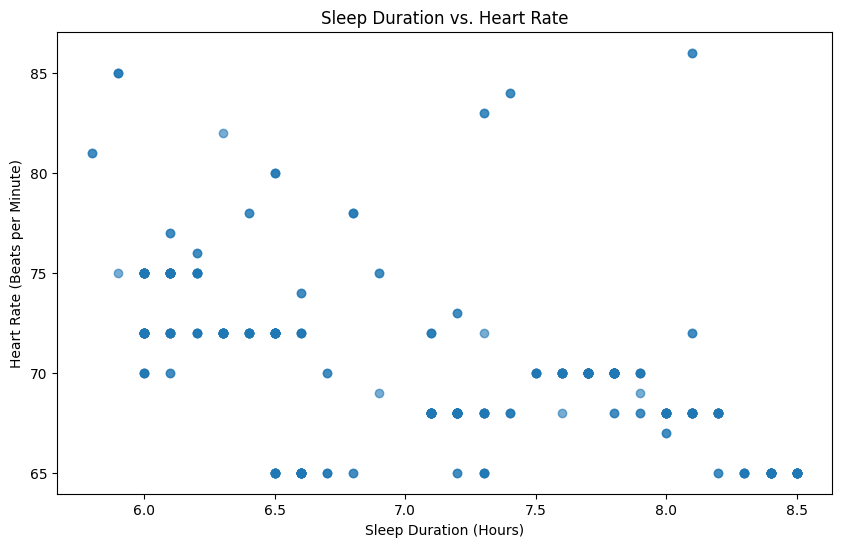

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset
sleep_health_lifestyle = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

# https://www.kaggle.com/datasets/mathurinache/world-happiness-report?resource=download
happiness_data = pd.read_csv('./data-2019.csv')

# https://www.kaggle.com/datasets/sujaykapadnis/what-humans-are-doing
time_use = pd.read_csv('all-countries.csv')
print(happiness_data.head())

# summary stats for the dataset
display(sleep_health_lifestyle.describe())

# histogram of Sleep Duration
plt.figure(figsize=(10, 6))
plt.hist(sleep_health_lifestyle['Sleep Duration'], bins=20, color='skyblue')
plt.title('Histogram of Sleep Duration')
plt.xlabel('Hours of Sleep')
plt.ylabel('Frequency')
plt.show()

# boxplot of Sleep Quality by BMI Category
plt.figure(figsize=(10, 6))
sns.boxplot(x='BMI Category', y='Quality of Sleep', data=sleep_health_lifestyle)
plt.title('Sleep Quality by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Quality of Sleep')
plt.show()

# scatter plot of Sleep Duration vs. Heart Rate
plt.figure(figsize=(10, 6))
plt.scatter(sleep_health_lifestyle['Sleep Duration'], sleep_health_lifestyle['Heart Rate'], alpha=0.6)
plt.title('Sleep Duration vs. Heart Rate')
plt.xlabel('Sleep Duration (Hours)')
plt.ylabel('Heart Rate (Beats per Minute)')
plt.show()


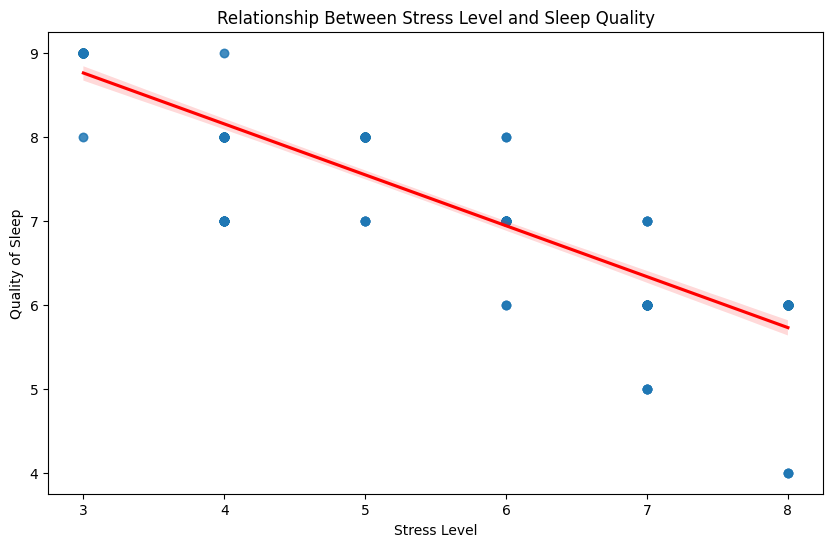

In [49]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Stress Level', y='Quality of Sleep', data=sleep_health_lifestyle, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Relationship Between Stress Level and Sleep Quality')
plt.xlabel('Stress Level')
plt.ylabel('Quality of Sleep')
plt.show()


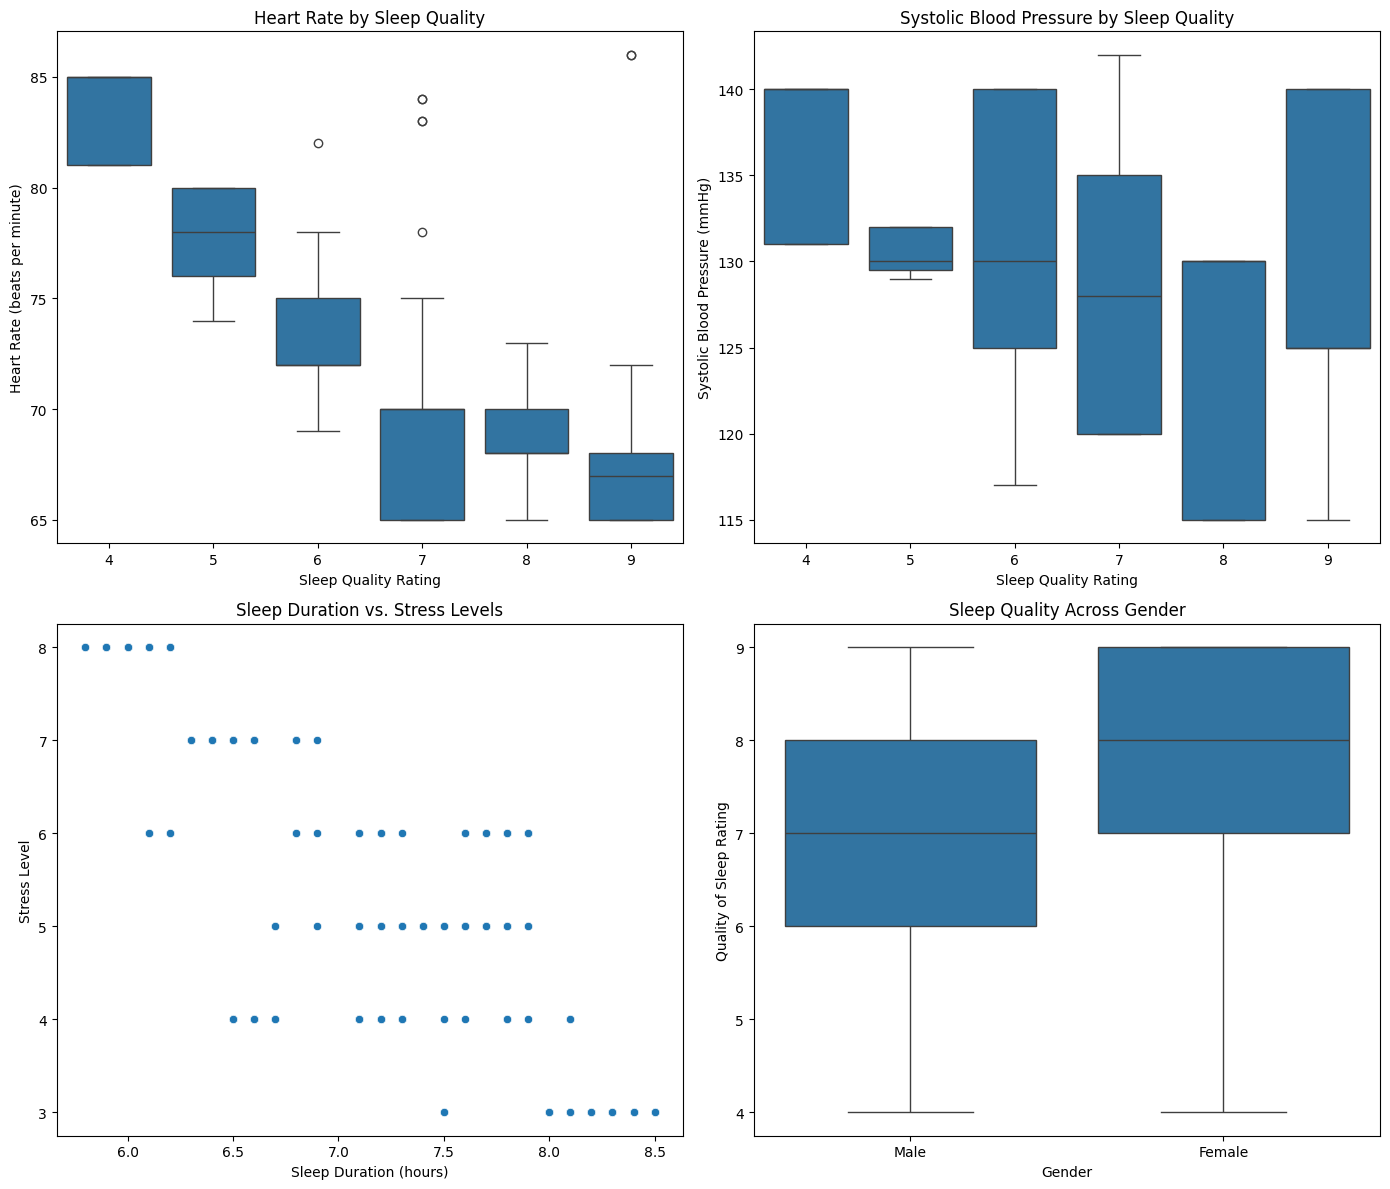

In [50]:
# Set up the figures for the plots
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Plot 1: Heart Rate by Sleep Quality
sns.boxplot(x='Quality of Sleep', y='Heart Rate', data=sleep_health_lifestyle, ax=axes[0, 0])
axes[0, 0].set_title('Heart Rate by Sleep Quality')
axes[0, 0].set_xlabel('Sleep Quality Rating')
axes[0, 0].set_ylabel('Heart Rate (beats per minute)')

# Plot 2: Blood Pressure by Sleep Quality
sleep_health_lifestyle['Systolic BP'] = sleep_health_lifestyle['Blood Pressure'].apply(lambda x: int(x.split('/')[0]))
sns.boxplot(x='Quality of Sleep', y='Systolic BP', data=sleep_health_lifestyle, ax=axes[0, 1])
axes[0, 1].set_title('Systolic Blood Pressure by Sleep Quality')
axes[0, 1].set_xlabel('Sleep Quality Rating')
axes[0, 1].set_ylabel('Systolic Blood Pressure (mmHg)')

# Plot 3: Sleep Duration vs. Stress Levels
sns.scatterplot(x='Sleep Duration', y='Stress Level', data=sleep_health_lifestyle, ax=axes[1, 0])
axes[1, 0].set_title('Sleep Duration vs. Stress Levels')
axes[1, 0].set_xlabel('Sleep Duration (hours)')
axes[1, 0].set_ylabel('Stress Level')

# Plot 4: Sleep Quality Across Gender Groups
sns.boxplot(x='Gender', y='Quality of Sleep', data=sleep_health_lifestyle, ax=axes[1, 1])
axes[1, 1].set_title('Sleep Quality Across Gender')
axes[1, 1].set_xlabel('Gender')
axes[1, 1].set_ylabel('Quality of Sleep Rating')

plt.tight_layout()
plt.show()


# T-test
The t-test conducted here is to compare between the mean heart rates between two groups: those with high sleep quality and those with low sleep quality.

In [51]:
from scipy.stats import ttest_ind, pearsonr, f_oneway

# Preparing data for t-test: Heart Rate across High vs Low Sleep Quality Groups
# Defining high quality as ratings 8 and above, low quality as ratings below 8
high_quality_hr = sleep_health_lifestyle[sleep_health_lifestyle['Quality of Sleep'] >= 8]['Heart Rate']
low_quality_hr = sleep_health_lifestyle[sleep_health_lifestyle['Quality of Sleep'] < 8]['Heart Rate']

# Conducting the t-test
t_test_results = ttest_ind(high_quality_hr, low_quality_hr, equal_var=False)

# Correlation test for Sleep Duration and Stress Levels
correlation_coefficient, p_value_corr = pearsonr(sleep_health_lifestyle['Sleep Duration'], sleep_health_lifestyle['Stress Level'])

t_test_results, (correlation_coefficient, p_value_corr)


(TtestResult(statistic=np.float64(-11.129194972458267), pvalue=np.float64(1.3898272008932421e-24), df=np.float64(324.23637376114476)),
 (np.float64(-0.8110230278940432), np.float64(1.2378076181537577e-88)))

In this section, I used a t-test and a pearson correlation test to determine the relationship between sleep and various factors such as heart rate, stress levels, and sleep quality differences across individuals.

# Results:
1) T-test: T-statistic: -11.129, P-value: 1.389e-24. This extremely low p-value suggests that there is a statistically significant difference in heart rates between the two sleep quality groups. (High vs Low sleep quality)

2) Pearson Correlation Test: Correlation Coefficient: -0.811, P-value: 1.238e-88. The negative correlation coefficient indicates a strong inverse relationship between sleep duration and stress levels, meaning that the lower your sleep quality, the higher your stress levels. The p-value further confirms that this relationship is statistically significant.

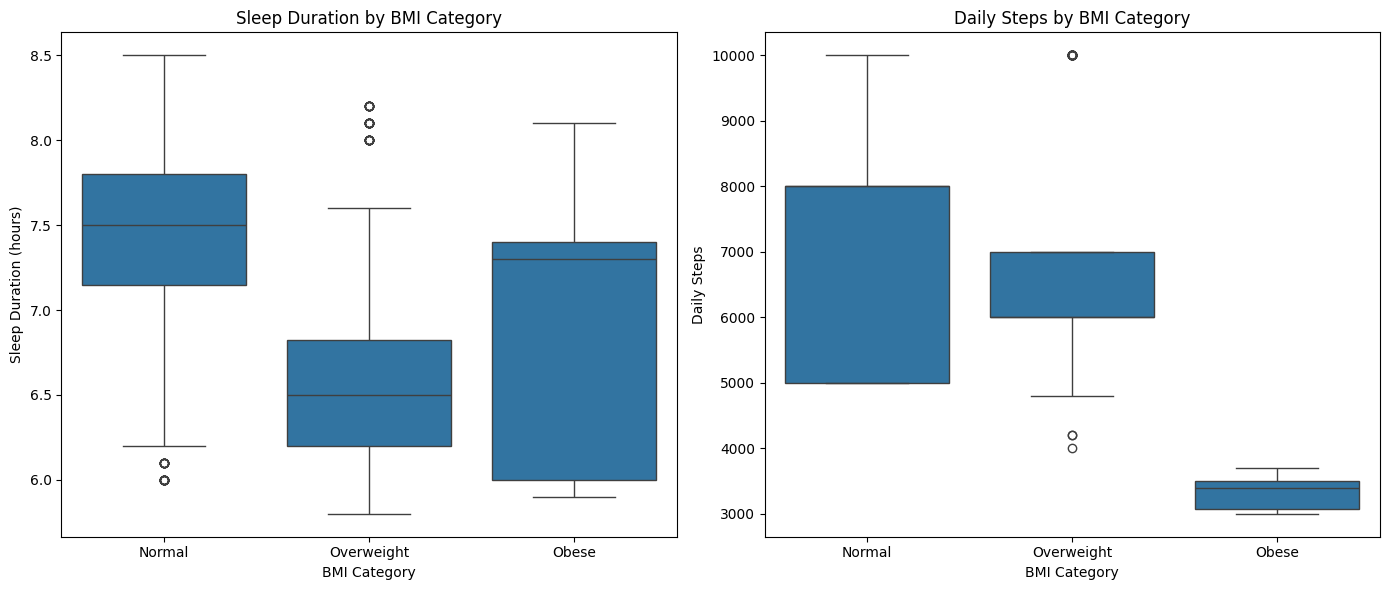

(F_onewayResult(statistic=np.float64(29.53721573917263), pvalue=np.float64(1.4011965231114319e-12)),
 F_onewayResult(statistic=np.float64(27.472651379347422), pvalue=np.float64(8.27072865567853e-12)))

In [52]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Sleep Duration by BMI Category
sns.boxplot(x='BMI Category', y='Sleep Duration', data=sleep_health_lifestyle, order=["Normal", "Overweight", "Obese"], ax=axes[0])
axes[0].set_title('Sleep Duration by BMI Category')
axes[0].set_xlabel('BMI Category')
axes[0].set_ylabel('Sleep Duration (hours)')

# Plot 2: Daily Steps by BMI Category
sns.boxplot(x='BMI Category', y='Daily Steps', data=sleep_health_lifestyle, order=["Normal", "Overweight", "Obese"], ax=axes[1])
axes[1].set_title('Daily Steps by BMI Category')
axes[1].set_xlabel('BMI Category')
axes[1].set_ylabel('Daily Steps')

plt.tight_layout()
plt.show()

# Preparing data for statistical tests
# Extracting sleep duration and daily steps for each BMI category
normal_sleep = sleep_health_lifestyle[sleep_health_lifestyle['BMI Category'] == 'Normal']['Sleep Duration']
overweight_sleep = sleep_health_lifestyle[sleep_health_lifestyle['BMI Category'] == 'Overweight']['Sleep Duration']
obese_sleep = sleep_health_lifestyle[sleep_health_lifestyle['BMI Category'] == 'Obese']['Sleep Duration']

normal_steps = sleep_health_lifestyle[sleep_health_lifestyle['BMI Category'] == 'Normal']['Daily Steps']
overweight_steps = sleep_health_lifestyle[sleep_health_lifestyle['BMI Category'] == 'Overweight']['Daily Steps']
obese_steps = sleep_health_lifestyle[sleep_health_lifestyle['BMI Category'] == 'Obese']['Daily Steps']

# Perform ANOVA for sleep duration across BMI categories
anova_sleep = f_oneway(normal_sleep, overweight_sleep, obese_sleep)

# Perform ANOVA for daily steps across BMI categories
anova_steps = f_oneway(normal_steps, overweight_steps, obese_steps)

anova_sleep, anova_steps


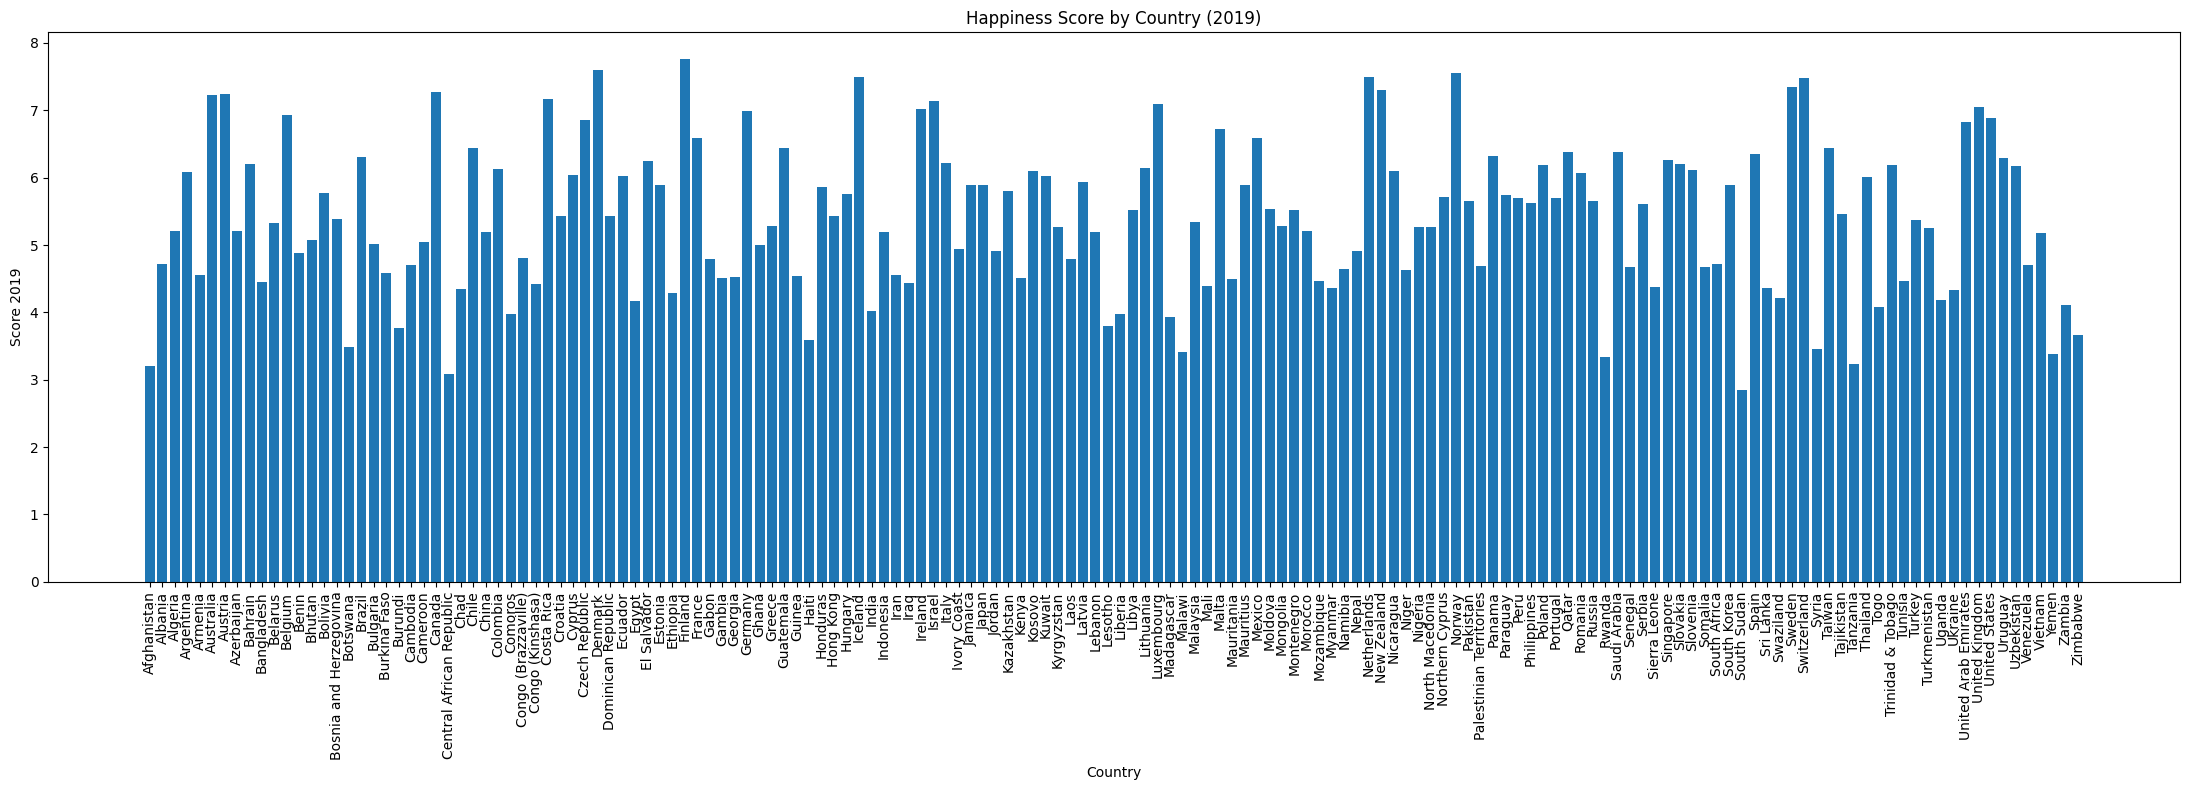

In [53]:
# Plotting the distribution of Happiness Scores by Country

df = happiness_data
plt.figure(figsize=(22, 8))
plt.bar(df['Country'], df['Score 2019'])
plt.xlabel('Country')
plt.ylabel('Score 2019')
plt.title('Happiness Score by Country (2019)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

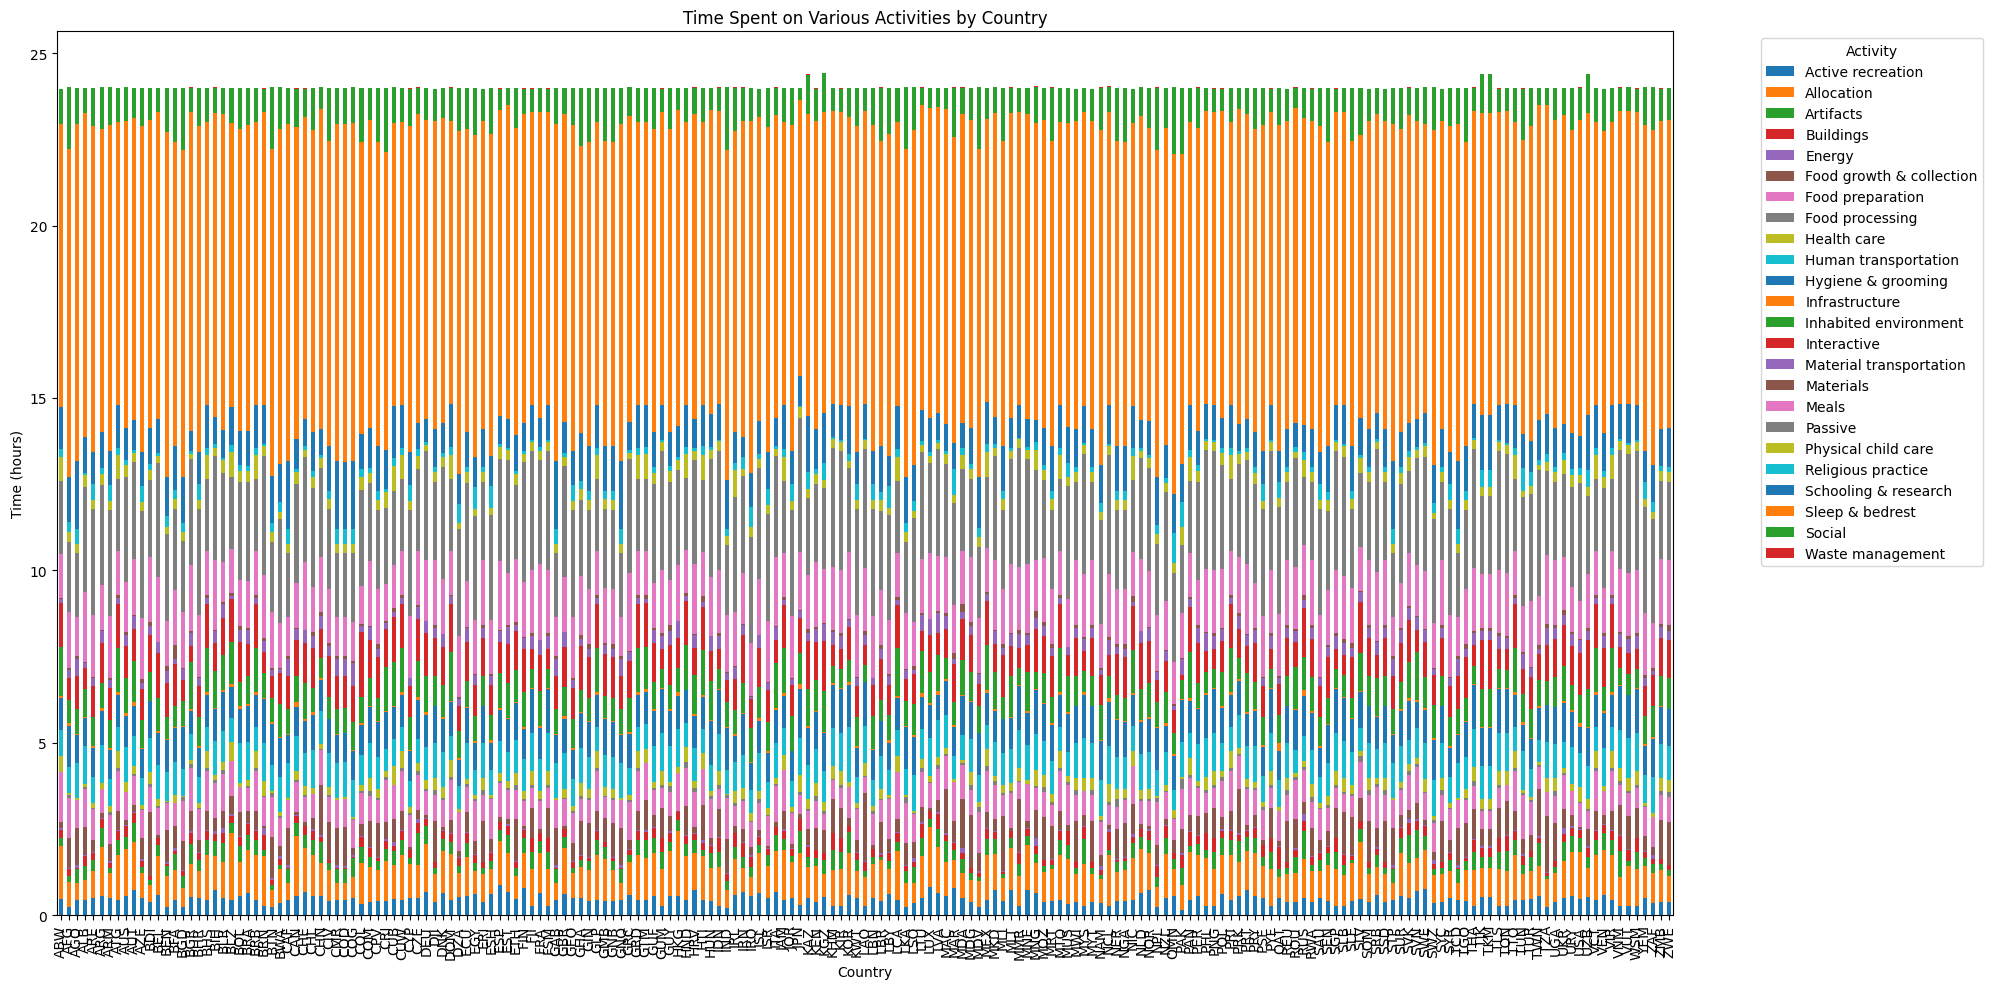

In [54]:
# Pivot the data
stacked_data = time_use.pivot(index='countryISO3', columns='Subcategory', values='hoursPerDayCombined')

# Plot the stacked bar chart
ax = stacked_data.plot(kind='bar', stacked=True, figsize=(20, 10))

# Customize the plot
plt.xlabel('Country')
plt.ylabel('Time (hours)')
plt.title('Time Spent on Various Activities by Country')
plt.legend(title='Activity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show the plot
plt.show()

## Individual Assignment #3.1: Applying Regression to Your Project
### The research problem and the hypothesis for this activity

2) The research problem and the hypothesis for this activity
    Question: Can a country's population's time use be used to predict their happiness?
    Sub-problems:
1.    Is there a correlation between sleep duration and stress level?
2. Is there a correlation between sleep duration and happiness ranking?
3. Is there a correlation between life expectancy and happiness?


    Subproblem done in this assignment: Is there a correlation between sleep duration and stress level?
    Hypothesis: There is a significant relationship between a person's sleep duration and their stress level

3) MSE: 0.911235988228852
R-squared: 0.7083360399574774

4) The conclusion to the hypothesis and to the research problem:
To conclude, the results show that there is a significant relationship between sleep duration and stress level which supports my hypothesis. The R-squared value of 0.7083360399574774 from the model indicates that there is approximately 70.83% of the variance of stress levels can be explained by our sleep duration. The MSE of 0.911235988228852 shows us the average (squared) difference between predicted outcome and our actual stress levels. Overall we can conclude that our stress levels are being affected by sleep duration



Mean Squared Error: 0.9112359882288513
R^2 Score: 0.7083360399574776


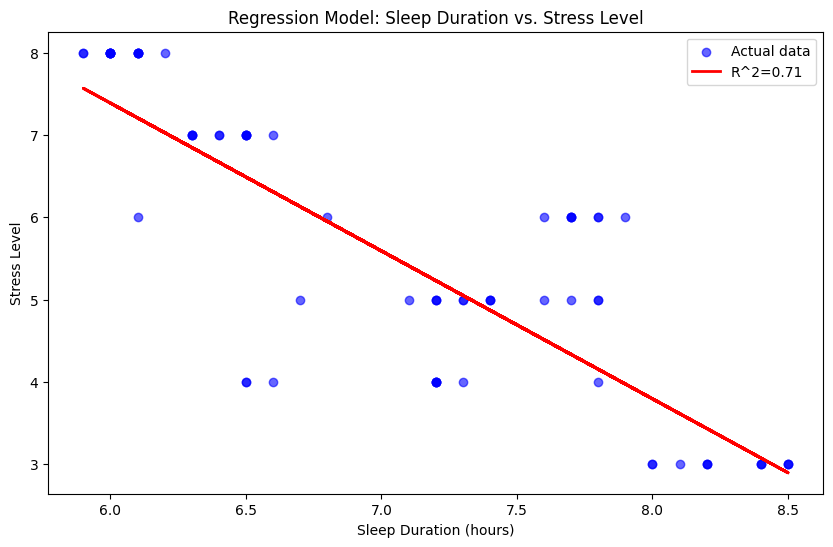

In [55]:
# Regression model between sleep duration and stress level
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Prepare the data
X = sleep_health_lifestyle[['Sleep Duration']]
y = sleep_health_lifestyle['Stress Level']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate mse
mse = mean_squared_error(y_test, y_pred)
mse
# Calculate r^2
r2_score = model.score(X_test, y_test)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2_score}')

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', alpha=0.6, label='Actual data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label=f"R^2={r2_score:.2f}")
plt.title('Regression Model: Sleep Duration vs. Stress Level')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Stress Level')

plt.legend()

plt.show()



# Multiple Linear Regression
To check which factor contributes most to a country's happiness level, multiple linear regression is used.

Independent Variables:
Dependent Variable: "Score 2019": The happiness score of a country in 2019

In [56]:
data = happiness_data[['Country','Region','Rank 2019','Score 2019','GDP 2019','Family 2019',
                    'Life Expectancy 2019','Freedom 2019','Trust 2019','Generosity 2019']]


In [57]:
import statsmodels.api as sm

# Define the dependent and independent variables

# Exclude non-numeric variables 'Country' and 'Region'
X = data[['GDP 2019', 'Family 2019', 'Life Expectancy 2019', 'Freedom 2019', 'Trust 2019', 'Generosity 2019']]
y = data['Score 2019']

# Add a constant to the independent variables
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())


# Add a constant to the independent variables
# This is required for the statsmodels library because it does not add a constant by default
# We need this constant because the linear regression model is represented as y = b0 + b1*x1 + b2*x2 + ... + bn*xn
# If we do not include a constant, the model will be represented as y = b1*x1 + b2*x2 + ... + bn*xn
# Which will lead to incorrect results because the model will not have an intercept term to account for the bias
# in the data for example if all the independent variables are 0, the dependent variable will still have a value
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Score 2019   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     87.62
Date:                Tue, 16 Jul 2024   Prob (F-statistic):           2.40e-46
Time:                        02:12:24   Log-Likelihood:                -119.76
No. Observations:                 156   AIC:                             253.5
Df Residuals:                     149   BIC:                             274.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.7952 

## Conclusion from multiple linear regression on a country's Happiness index
From earlier, we have found out that life expectancy has a positive correlation to a country's happiness score. Through research I have found from multiple sources backing the existence of a correlation between health factors (such as BMI, heart rate, stress level and blood pressure) to the longevity of a person.

### Relevant Literature
Source:
1. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5418561/
2. https://www.nature.com/articles/s41398-021-01735-7#Sec8
3. https://www.reanfoundation.org/low-resting-heart-rate-and-lifespan/

So in order to figure out if we can use sleep quality as an indicator to a country's happiness, merge the datasets of what_humans_are_doingthe index.

In [58]:
# Extract relevant columns from the second dataset
sleep_data_2021 = time_use[time_use['Subcategory'] == 'Sleep & bedrest']
print("Sleep Time By Country")
print(sleep_data_2021.head())

Sleep Time By Country
                Category      Subcategory countryISO3 region_code  population  \
9    Somatic maintenance  Sleep & bedrest         ABW        AM_C    101665.0   
33   Somatic maintenance  Sleep & bedrest         AFG        AS_S  36296111.0   
57   Somatic maintenance  Sleep & bedrest         AGO        AF_M  31825299.0   
81   Somatic maintenance  Sleep & bedrest         ALB        EU_S   2896307.0   
105  Somatic maintenance  Sleep & bedrest         ARE        AS_W   9770526.0   

     hoursPerDayCombined  uncertaintyCombined    dataStatus dataStatusEconomic  
9                   8.21             3.883858  interpolated           observed  
33                  9.49             0.977807  interpolated           observed  
57                  9.79             1.291399  interpolated       interpolated  
81                  9.40             0.170536      observed           observed  
105                 9.45             1.334729  interpolated       interpolated  


In [59]:
# Right now the name of the countries are represented by their ISO3 codes so we need to convert them to full country names
# so that we can further combine the data with happiness index dataset.
# Source: https://www.kaggle.com/datasets/andradaolteanu/iso-country-codes-global

# Load the ISO country codes dataset
iso_country_codes = pd.read_csv('wikipedia-iso-country-codes.csv')

iso_country_codes.columns = ['Country', 'Alpha-2 code', 'Alpha-3 code', 'Numeric code', 'ISO 3166-2']

# Merge sleep_data_2021 with iso_country_codes to get full country names
sleep_data = pd.merge(sleep_data_2021, iso_country_codes[['Alpha-3 code', 'Country']],
                           left_on='countryISO3', right_on='Alpha-3 code', how='left')

# Select and rename columns to match Dataset 1 format
sleep_data = sleep_data[['Country', 'hoursPerDayCombined']]
sleep_data = sleep_data.rename(columns={'hoursPerDayCombined': 'Sleep Time (minutes)'})

# Convert sleep duration from hours to minutes
sleep_data['Sleep Time (minutes)'] = sleep_data['Sleep Time (minutes)'] * 60


# Reorder columns to match Dataset 1 format
sleep_data = sleep_data[['Country', 'Sleep Time (minutes)']]

# Set 'Country' as the index
sleep_data = sleep_data.set_index('Country')

# Round 'Time (minutes)' to the nearest integer
sleep_data['Sleep Time (minutes)'] = sleep_data['Sleep Time (minutes)'].round().astype(int)

print("Sleep Data")
print(sleep_data.head())



Sleep Data
                      Sleep Time (minutes)
Country                                   
Aruba                                  493
Afghanistan                            569
Angola                                 587
Albania                                564
United Arab Emirates                   567


In [60]:
# Merge in happiness index (2019)
data = data.set_index('Country')

# Grab 'Country' and 'Score 2019' columns
happiness_data = happiness_data[['Country', 'Score 2019']]

# Merge with our sleep data
merged_data = pd.merge(sleep_data, happiness_data,
                       left_index=True, right_on='Country',
                       how='inner')

# Set 'Country' as the index again
merged_data = merged_data.set_index('Country')

merged_data = merged_data.rename(columns={'Sleep Time (minutes)': 'Sleep Time (minutes)',
                                          'Score 2019': 'Happiness Score'})

print(merged_data.head())

                      Sleep Time (minutes)  Happiness Score
Country                                                    
Afghanistan                            569            3.203
Albania                                564            4.719
United Arab Emirates                   567            6.825
Argentina                              527            6.086
Armenia                                567            4.559


Here i normalize the data using MinMaxScaler so that all the features are on the same scale.
This allow our model to learn the weights of the features more effectively and converge faster.

In [61]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Fit the scaler to your data and transform
normalized_data = scaler.fit_transform(merged_data)

# Convert back to a DataFrame
normalized_df = pd.DataFrame(normalized_data, columns=merged_data.columns, index=merged_data.index)

print(normalized_df.head())

                      Sleep Time (minutes)  Happiness Score
Country                                                    
Afghanistan                       0.666667         0.025608
Albania                           0.628788         0.349125
United Arab Emirates              0.651515         0.798549
Argentina                         0.348485         0.640845
Armenia                           0.651515         0.314981


# Modeling The Data

Now that we have extracted and cleaned the data, I will use Linear Regression to model our data. The data will be split in a 60:40 ratio.

Mean squared error: 0.04417406663561671
R-squared score: 0.05621186017827362


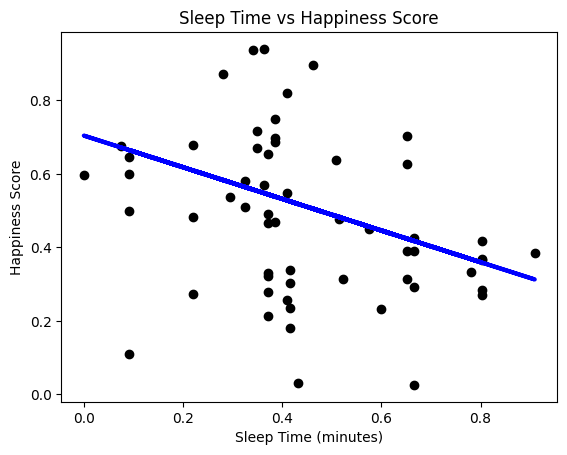

Intercept: 0.7041217128248263
Coefficient: -0.43060567039954356


In [62]:
from sklearn.metrics import r2_score as r2_score_func

X = normalized_df[['Sleep Time (minutes)']]
y = normalized_df['Happiness Score']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score_func(y_test, y_pred)

print(f"Mean squared error: {mse}")
print(f"R-squared score: {r2}")

# Plot the results
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Sleep Time (minutes)')
plt.ylabel('Happiness Score')
plt.title('Sleep Time vs Happiness Score')
plt.show()

# Print the model coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")

Mean squared error: 0.04585306549325808
R-squared score: 0.020339699670902323


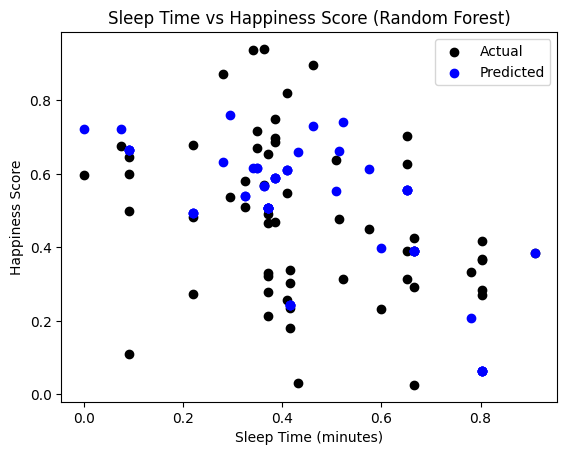

In [63]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Prepare the data
X = normalized_df[['Sleep Time (minutes)']]
y = normalized_df['Happiness Score']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean squared error: {mse}")
print(f"R-squared score: {r2}")

# Plot the results
plt.scatter(X_test, y_test, color='black', label='Actual')
plt.scatter(X_test, y_pred, color='blue', label='Predicted')
plt.xlabel('Sleep Time (minutes)')
plt.ylabel('Happiness Score')
plt.title('Sleep Time vs Happiness Score (Random Forest)')
plt.legend()
plt.show()


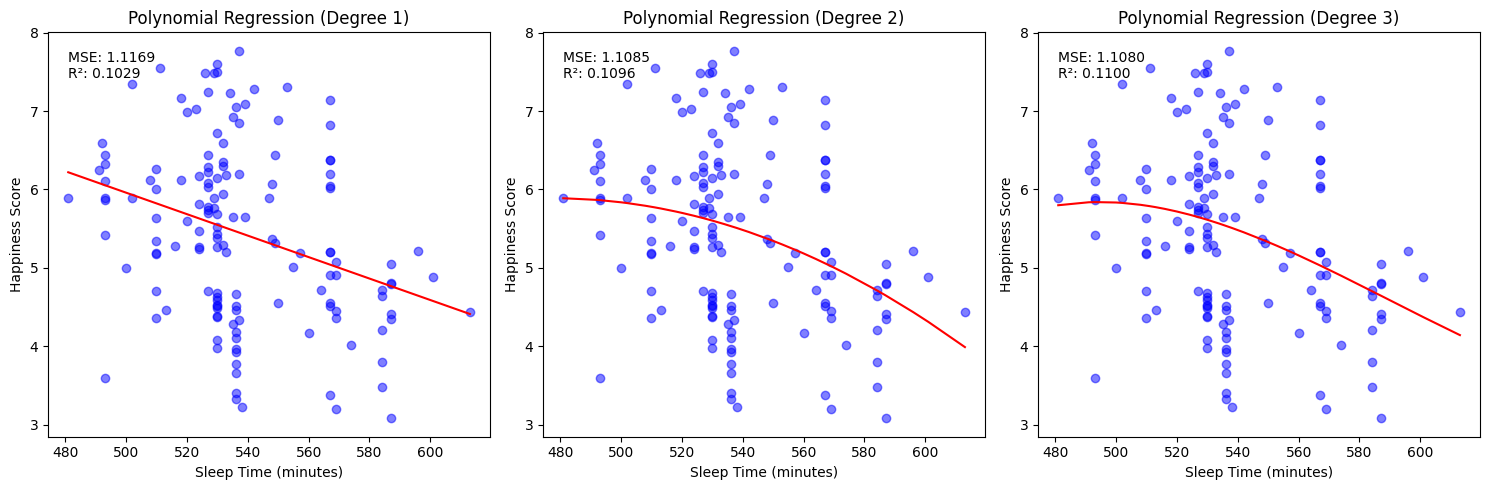

In [64]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the data
X = merged_data['Sleep Time (minutes)'].values.reshape(-1, 1)
y = merged_data['Happiness Score'].values

# Create polynomial features
# We'll try degrees 1, 2, and 3
degrees = [1, 2, 3]

plt.figure(figsize=(15, 5))

for i, degree in enumerate(degrees, 1):
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly_features.fit_transform(X)

    # Fit the model
    model = LinearRegression()
    model.fit(X_poly, y)

    # Make predictions
    y_pred = model.predict(X_poly)

    # Calculate MSE and R-squared
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    # Plot the results
    plt.subplot(1, 3, i)
    plt.scatter(X, y, color='blue', alpha=0.5)

    # Sort X for smooth curve plotting
    X_sorted = np.sort(X, axis=0)
    X_poly_sorted = poly_features.transform(X_sorted)
    y_poly_pred = model.predict(X_poly_sorted)

    plt.plot(X_sorted, y_poly_pred, color='red')
    plt.title(f'Polynomial Regression (Degree {degree})')
    plt.xlabel('Sleep Time (minutes)')
    plt.ylabel('Happiness Score')
    plt.text(X.min(), y.max(), f'MSE: {mse:.4f}\nR²: {r2:.4f}', verticalalignment='top')

plt.tight_layout()
plt.show()

In [65]:

# Print the coefficients for the highest degree polynomial
highest_degree = max(degrees)
poly_features = PolynomialFeatures(degree=highest_degree, include_bias=False)
X_poly = poly_features.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, y)

poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_features.fit_transform(X)
poly_model = LinearRegression()
poly_model.fit(X_poly, y)
y_pred_poly = poly_model.predict(X_poly)
r2_poly = r2_score(y, y_pred_poly)
mse_poly = mean_squared_error(y, y_pred_poly)

print(f"\nCoefficients for {highest_degree}-degree polynomial:")
for i, coef in enumerate(model.coef_):
    print(f"x^{i+1}: {coef:.4f}")

print(f"Polynomial R^2: {r2_poly:.4f}, MSE: {mse_poly:.4f}")


Coefficients for 3-degree polynomial:
x^1: 0.7350
x^2: -0.0013
x^3: 0.0000
Polynomial R^2: 0.1100, MSE: 1.1080


# Conclusion
This project aimed to explore the relationship between sleep duration and happiness scores across different countries. Through this project we can conclude that:


1.   **Weak Correlation:** Our models consistently showed a weak relationship between sleep duration and happiness scores. This suggests that while sleep may play a role in happiness, it's not a strong predictor on its own at a country level.
2.   **Model Performance:** The linear regression model performed similarly to more complex models like polynomial regression and Random Forest. This indicates that the relationship, while weak, is primarily linear in nature.
3. **Other Factors:** The low R-squared values across all models suggest that there are many other factors influencing a country's happiness score beyond sleep duration. This aligns with the complex, multifaceted nature of happiness as a concept.
4. **Data Limitations:** Since we're working with country-level averages, it may not be accurate on individual-level relationships between sleep and happiness.

# Final Thoughts:
While sleep is often associated with well-being on an individual level, our analysis shows that this relationship isn't strongly reflected in country-level data.

It is possible that there is not enough data to precisely build the model. It would have been much better if I could get data for each year (for the happiness index and also sleep duration) instead of data that has been aggergated through surveys across multiple years like the one in my dataset.

# Discussion: Using Random Forest for Classification

Goal: To determine which feature of data contributes the most to our happiness data.



In [66]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Assuming 'data' is your DataFrame
X = data[['GDP 2019', 'Family 2019', 'Life Expectancy 2019', 'Freedom 2019', 'Trust 2019', 'Generosity 2019']]
y = data['Score 2019']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_
feature_names = X.columns

# Sort features by importance
feature_importance = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)

for name, importance in feature_importance:
    print(f"{name}: {importance}")

Family 2019: 0.5287327805545398
GDP 2019: 0.2107527194652885
Life Expectancy 2019: 0.13444869716553934
Trust 2019: 0.05368154024573787
Freedom 2019: 0.05028416079393344
Generosity 2019: 0.022100101774961297


In [67]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Calculate MSE and RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.29149904559687556
Root Mean Squared Error: 0.5399065156088372
R-squared: 0.6979766337297825


In [68]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Create happiness level categories
def categorize_happiness(score):
    if score < 4:
        return 'Low'
    elif score < 6:
        return 'Medium'
    else:
        return 'High'

data['Happiness_Category'] = data['Score 2019'].apply(categorize_happiness)

X = data[['GDP 2019', 'Family 2019', 'Life Expectancy 2019', 'Freedom 2019', 'Trust 2019', 'Generosity 2019']]
y = data['Happiness_Category']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature importance
for name, importance in zip(X.columns, rf_classifier.feature_importances_):
    print(f"{name}: {importance}")

Accuracy: 0.6875

Classification Report:
              precision    recall  f1-score   support

        High       0.57      0.80      0.67         5
         Low       0.25      0.25      0.25         4
      Medium       0.81      0.74      0.77        23

    accuracy                           0.69        32
   macro avg       0.54      0.60      0.56        32
weighted avg       0.70      0.69      0.69        32

GDP 2019: 0.26364691198212753
Family 2019: 0.2219811391347784
Life Expectancy 2019: 0.18817967561088464
Freedom 2019: 0.16247532965362754
Trust 2019: 0.09584327144498996
Generosity 2019: 0.067873672173592


Model Performance:
The overall accuracy of the model is 68.75%, which indicates moderate performance.
The model performs best in predicting the "Medium" happiness category (F1-score: 0.77), followed by "High" (F1-score: 0.67), and struggles most with the "Low" category (F1-score: 0.25).

Feature Importance:

GDP in 2019 appears to be the most important feature (0.2636), followed closely by Family (0.2219).
Life Expectancy and Freedom also play significant roles.
Trust and Generosity have relatively lower importance.

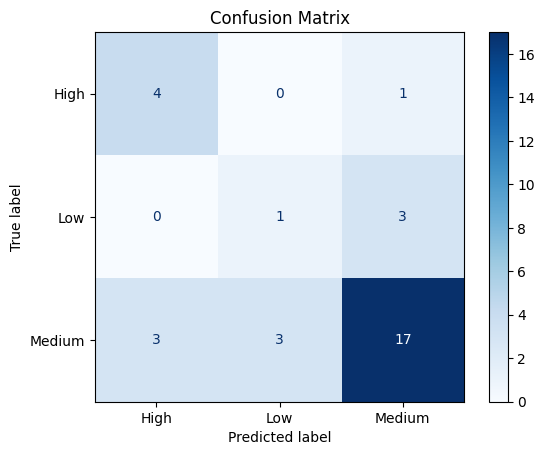

Confusion Matrix:
[[ 4  0  1]
 [ 0  1  3]
 [ 3  3 17]]

For class High:
True Positives (TP): 4
False Positives (FP): 3
True Negatives (TN): 24
False Negatives (FN): 1

For class Low:
True Positives (TP): 1
False Positives (FP): 3
True Negatives (TN): 25
False Negatives (FN): 3

For class Medium:
True Positives (TP): 17
False Positives (FP): 4
True Negatives (TN): 5
False Negatives (FN): 6


In [69]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

# Create labels for the confusion matrix
labels = ['High', 'Low', 'Medium']

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Calculate TP, FP, TN, FN for each class
for i, class_name in enumerate(labels):
    tp = cm[i, i]
    fp = cm[:, i].sum() - tp
    fn = cm[i, :].sum() - tp
    tn = cm.sum() - (tp + fp + fn)
    
    print(f"\nFor class {class_name}:")
    print(f"True Positives (TP): {tp}")
    print(f"False Positives (FP): {fp}")
    print(f"True Negatives (TN): {tn}")
    print(f"False Negatives (FN): {fn}")